In [30]:
import warnings
warnings.filterwarnings(action='ignore')

import random
import pandas as pd
import numpy as np

SEED = 43
random.seed(SEED)
np.random.seed(SEED)

from dataset import get_data
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = "../data/kaggle_data/"

In [4]:
# make dataset

def data_extract(df_dict, df, name, cols):
       for col in cols:
              df_dict[f"{name}_{col}"] = df.loc[df[col] != 0, col]
              df_dict[f"{name}_{col}"].index = pd.to_datetime(df.loc[df[col] != 0, 'date'])
       return df_dict

train_data_list = []
val_data_list = []

pmj_df = pd.read_csv(DATA_PATH + "pjm_elec_daily.csv")
pmj_cols = ['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'FE', 'NI', 'PJME', 'PJMW'] # 'PJM_Load', 'EKPC'

df_dict = {}

df_dict = data_extract(df_dict, pmj_df, 'PMJ', pmj_cols)

for df_name in df_dict:
    df = df_dict[df_name]
    train_data, val_data, scaler = get_data(df, False)
    print(df_name, len(train_data[0]), len(val_data[0]))
    train_data_list.append((train_data, df_name, scaler))
    val_data_list.append((val_data, df_name, scaler))

PMJ_AEP 4044 1011
PMJ_COMED 2217 555
PMJ_DAYTON 4044 1011
PMJ_DEOK 1925 482
PMJ_DOM 3874 969
PMJ_DUQ 3970 993
PMJ_FE 2096 525
PMJ_NI 1949 488
PMJ_PJME 4847 1212
PMJ_PJMW 4775 1194


In [7]:
(tmp_idx, tmp_data), t, scaler = train_data_list[0]
tmp_data = pd.DataFrame(tmp_data)
tmp_data.index = tmp_idx
tmp_data

,0
date,
2004-10-01,328544.0
2004-10-02,311997.0
2004-10-03,293450.0
2004-10-04,343417.0
2004-10-05,346553.0
...,...
2015-10-23,312426.0
2015-10-24,284185.0
2015-10-25,273661.0


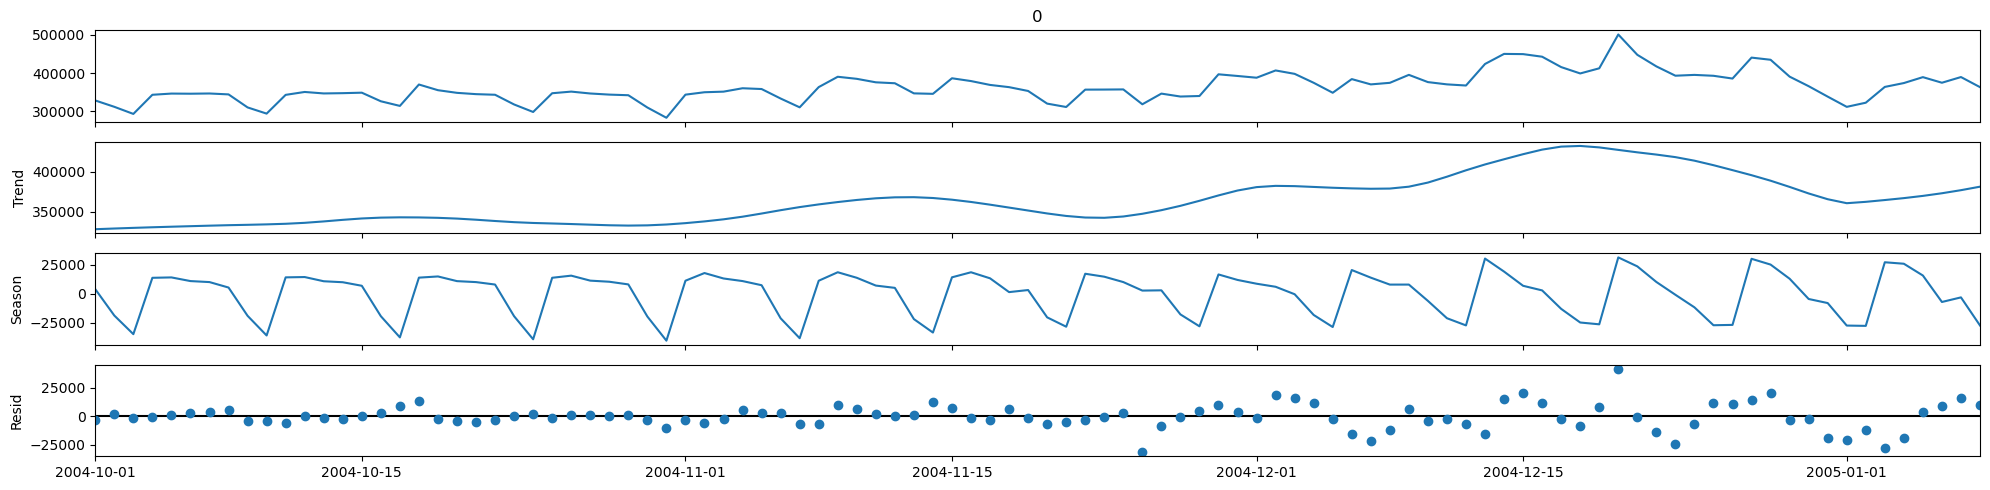

In [97]:
import matplotlib as mpl

priod = 100
result_stl = STL(tmp_data[0][:priod]).fit()

with mpl.rc_context():
    mpl.rc("figure", figsize=(20,5))
    result_stl.plot()
    plt.show()

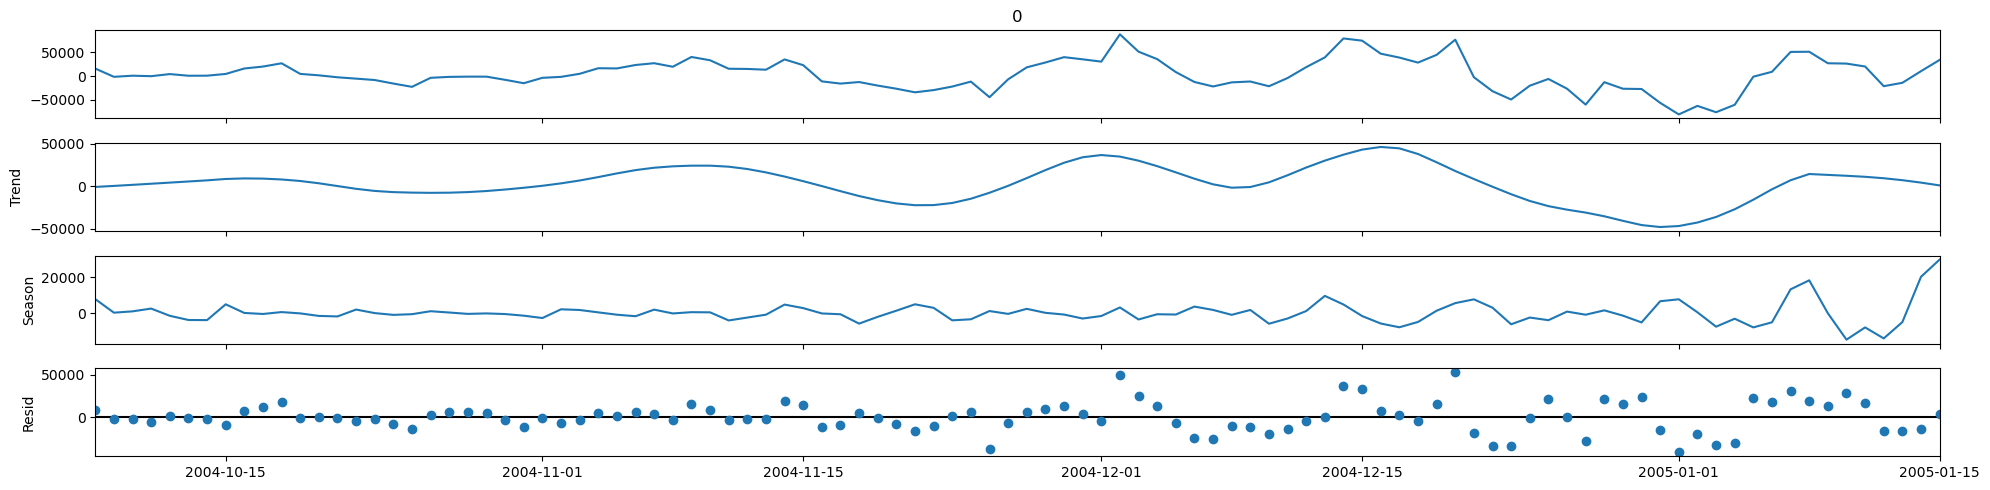

In [98]:
tmp_diff = tmp_data.diff(7).dropna()
result_stl2 = STL(tmp_diff[0][:priod]).fit()

with mpl.rc_context():
    mpl.rc("figure", figsize=(20,5))
    result_stl2.plot()
    plt.show()

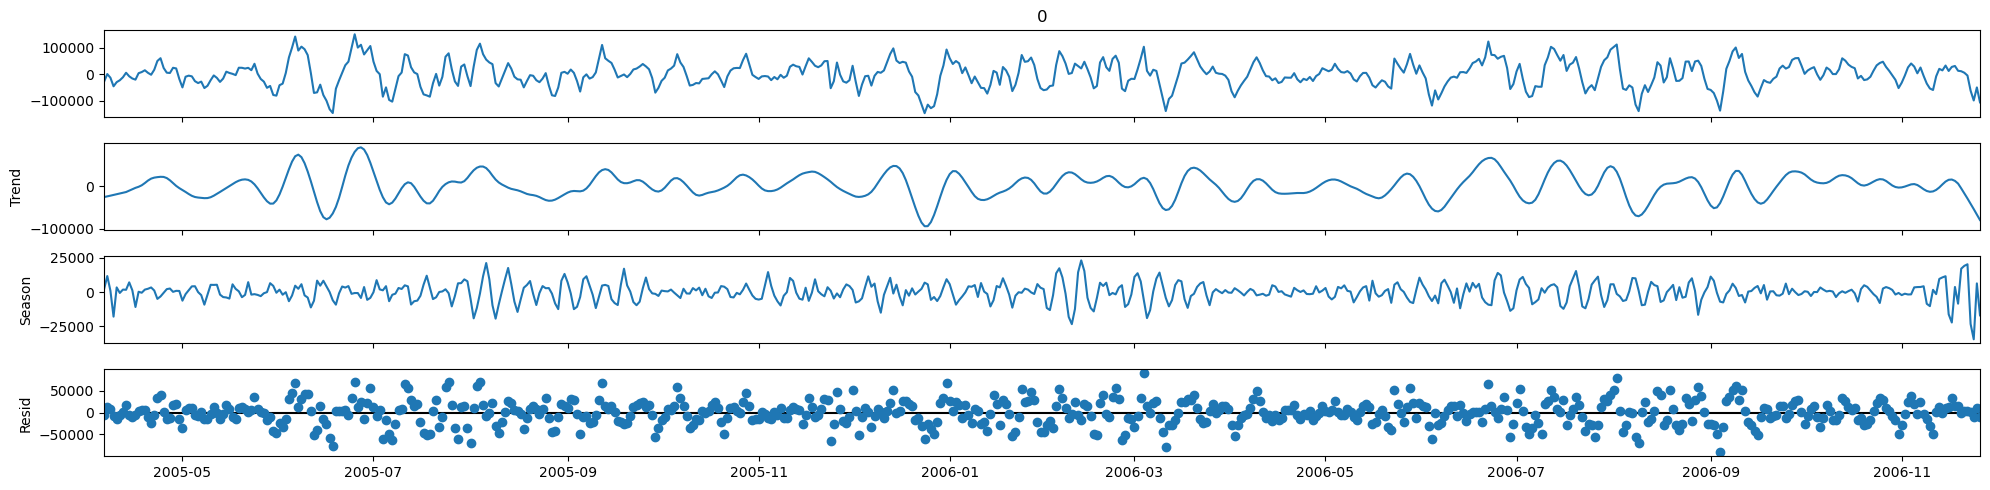

In [91]:
tmp_diff2 = tmp_diff.diff(180).dropna()

result_stl3 = STL(tmp_diff2[0][:priod]).fit()

with mpl.rc_context():
    mpl.rc("figure", figsize=(20,5))
    result_stl3.plot()
    plt.show()